In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [2]:
path = 'all_sp.csv'

In [3]:
seasons = pandas.read_csv(path, sep=',')
sp = seasons.groupby(['Character']).size().sort_values(ascending=False)
sp

Character
Cartman               9774
Stan                  7680
Kyle                  7099
Butters               2602
Randy                 2467
Mr. Garrison          1002
Chef                   917
Kenny                  881
Sharon                 862
Mr. Mackey             633
Gerald                 626
Jimmy                  597
Wendy                  585
Liane                  582
Sheila                 566
Jimbo                  556
Announcer              407
Stephen                357
Craig                  326
Clyde                  317
Jesus                  312
Linda                  290
Principal Victoria     289
Terrance               282
Mrs. Garrison          282
Token                  278
Timmy                  263
Mayor                  245
Tweek                  233
Phillip                222
                      ... 
M.C                      1
MJ's Hologram            1
Ma'am                    1
Madonna                  1
Magician                 1
Male Activist     

Датасет не сбалансирован -- после Кайла идёт большой разрыв. Я возьму персонажей, у которых 1000 и более реплик.
Т.е. первых шестерых. 

### Датасет как он есть

In [4]:
sp1 = sp[:6]
south = seasons.loc[(seasons['Character'] == 'Cartman') | (seasons['Character'] == 'Stan') |
                  (seasons['Character'] == 'Kyle') | (seasons['Character'] == 'Butters') |
                  (seasons['Character'] == 'Randy')| (seasons['Character'] == 'Mr. Garrison')
            ]
sp1
south

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...
10,10,1,Stan,"Dude, how are we gonna go on? Chef was our fuh..."
17,10,1,Randy,"Good-bye, Chef! Have a great time with the Sup..."
19,10,1,Kyle,"Draw two card, fatass.\n"
20,10,1,Cartman,"Reverse to you, Jew. \n"
21,10,1,Stan,I'll get it. \n


In [5]:
import nltk
from nltk import word_tokenize
from nltk import RegexpTokenizer
from nltk import stem
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

Токенизация без учёта знаков (не считает их отдельными токенами), стоп-слова я решила включить, а вот мат не удалять --
мало ли, в южном парке это может быть особенностью персонажа.
Байес без лемматизации и стемминга:

In [6]:
from nltk import RegexpTokenizer
def tokenize1(text):    
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

bow1 = TfidfVectorizer(tokenizer=RegexpTokenizer(r'\w+').tokenize, stop_words='english')
bow1.fit_transform(south['Line'])
bowed = bow1.transform(south['Line'])
naive_model = MultinomialNB()
naive_model.fit(bowed, south['Character'])
bowed = bow1.transform(south['Line'])


In [7]:
cv_results = cross_val_score(naive_model, bowed, south['Character'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())
print(classification_report(naive_model.predict(bowed), south['Character']))

0.362786214992 0.0097993971712
              precision    recall  f1-score   support

     Butters       0.13      0.95      0.23       364
     Cartman       0.90      0.48      0.62     18483
        Kyle       0.37      0.67      0.48      3975
Mr. Garrison       0.01      0.91      0.02        11
       Randy       0.09      0.96      0.17       236
        Stan       0.54      0.55      0.55      7555

 avg / total       0.73      0.53      0.58     30624



In [8]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Со стеммингом:

In [9]:
from nltk.stem.snowball import EnglishStemmer

In [10]:
def tokenize2(text):
    stems = []
    for i in RegexpTokenizer(r'\w+').tokenize(text):
        stems.append(EnglishStemmer(ignore_stopwords=False).stem(i))            
    return stems

In [11]:
bow1 = TfidfVectorizer(tokenizer=tokenize2, stop_words='english')
bow1.fit_transform(south['Line'])
bowed = bow1.transform(south['Line'])
naive_model1 = MultinomialNB()
naive_model1.fit(bowed, south['Character'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
cv_results = cross_val_score(naive_model1, bowed, south['Character'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())
print(classification_report(naive_model1.predict(bowed), south['Character']))

0.362885278151 0.00976545311718
              precision    recall  f1-score   support

     Butters       0.15      0.94      0.26       421
     Cartman       0.88      0.47      0.61     18335
        Kyle       0.35      0.64      0.45      3890
Mr. Garrison       0.01      0.86      0.01         7
       Randy       0.11      0.96      0.19       275
        Stan       0.52      0.52      0.52      7696

 avg / total       0.71      0.52      0.56     30624



Со стеммингом результаты хуже. Теперь посмотрим лес

In [13]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(bowed, south['Character'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [14]:
cv_results = cross_val_score(rforest, bowed, south['Character'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())
print(classification_report(rforest.predict(bowed), south['Character']))

KeyboardInterrupt: 

Лес не хочет грузиться :( (наверное, памяти мало). Регрессия:

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(bowed, south['Character'], test_size=0.2)
clf.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, clf.predict(X_test)))
print(confusion_matrix(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

     Butters       0.38      0.49      0.43       524
     Cartman       0.55      0.56      0.55      1924
        Kyle       0.39      0.35      0.37      1460
Mr. Garrison       0.29      0.43      0.34       218
       Randy       0.37      0.42      0.39       490
        Stan       0.40      0.35      0.37      1509

 avg / total       0.44      0.44      0.43      6125

[[ 257   89   53   11   37   77]
 [ 138 1074  270   80  101  261]
 [ 110  338  507   49   97  359]
 [  20   33   24   94   19   28]
 [  43   87   65   28  208   59]
 [ 100  338  372   67  107  525]]


Confusion matrix, without normalization
[[ 257   89   53   11   37   77]
 [ 138 1074  270   80  101  261]
 [ 110  338  507   49   97  359]
 [  20   33   24   94   19   28]
 [  43   87   65   28  208   59]
 [ 100  338  372   67  107  525]]
Normalized confusion matrix
[[ 0.49  0.17  0.1   0.02  0.07  0.15]
 [ 0.07  0.56  0.14  0.04  0.05  0.14]
 [ 0.08  0.23  0.35  0.03  0.07  0.25]
 [ 0.09  0.15  0.11  0.43  0.09  0.13]
 [ 0.09  0.18  0.13  0.06  0.42  0.12]
 [ 0.07  0.22  0.25  0.04  0.07  0.35]]


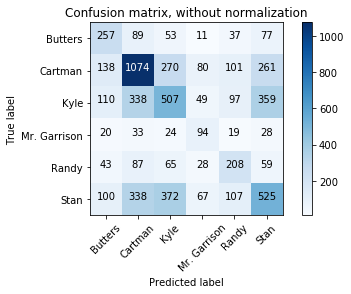

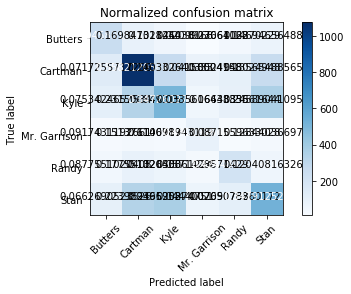

In [18]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Регрессия сработала хуже,чем Байес. Ожидаемо, что лучше всех распознается Картман, реплик которого больше всего в датасете.